In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [33]:
df = pd.read_csv("../data/Tourism_pre.CSV")

# 데이터 샘플 확인
df.head()

,Unnamed: 0.1,Unnamed: 0,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,0,0,41.000000,1,3,6.0,2,1,3,3.0,...,3.0,2,1.0,1,2,1,0.0,2,20993.0,1
1,1,1,49.000000,0,1,14.0,2,2,3,4.0,...,4.0,0,2.0,0,3,1,2.0,2,20130.0,0
2,2,2,37.000000,1,1,8.0,0,2,3,4.0,...,3.0,2,7.0,1,3,0,0.0,1,17090.0,1
3,3,3,33.000000,0,1,9.0,2,1,2,3.0,...,3.0,0,2.0,1,5,1,1.0,1,17909.0,0
4,4,4,37.622265,1,1,8.0,3,2,2,3.0,...,4.0,0,1.0,0,5,1,0.0,1,18468.0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              4863 non-null   int64  
 1   Unnamed: 0                4863 non-null   int64  
 2   Age                       4863 non-null   float64
 3   TypeofContact             4863 non-null   int64  
 4   CityTier                  4863 non-null   int64  
 5   DurationOfPitch           4863 non-null   float64
 6   Occupation                4863 non-null   int64  
 7   Gender                    4863 non-null   int64  
 8   NumberOfPersonVisiting    4863 non-null   int64  
 9   NumberOfFollowups         4863 non-null   float64
 10  ProductPitched            4863 non-null   int64  
 11  PreferredPropertyStar     4863 non-null   float64
 12  MaritalStatus             4863 non-null   int64  
 13  NumberOfTrips             4863 non-null   float64
 14  Passport

4888 행, 20 열

In [35]:
df.isnull().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

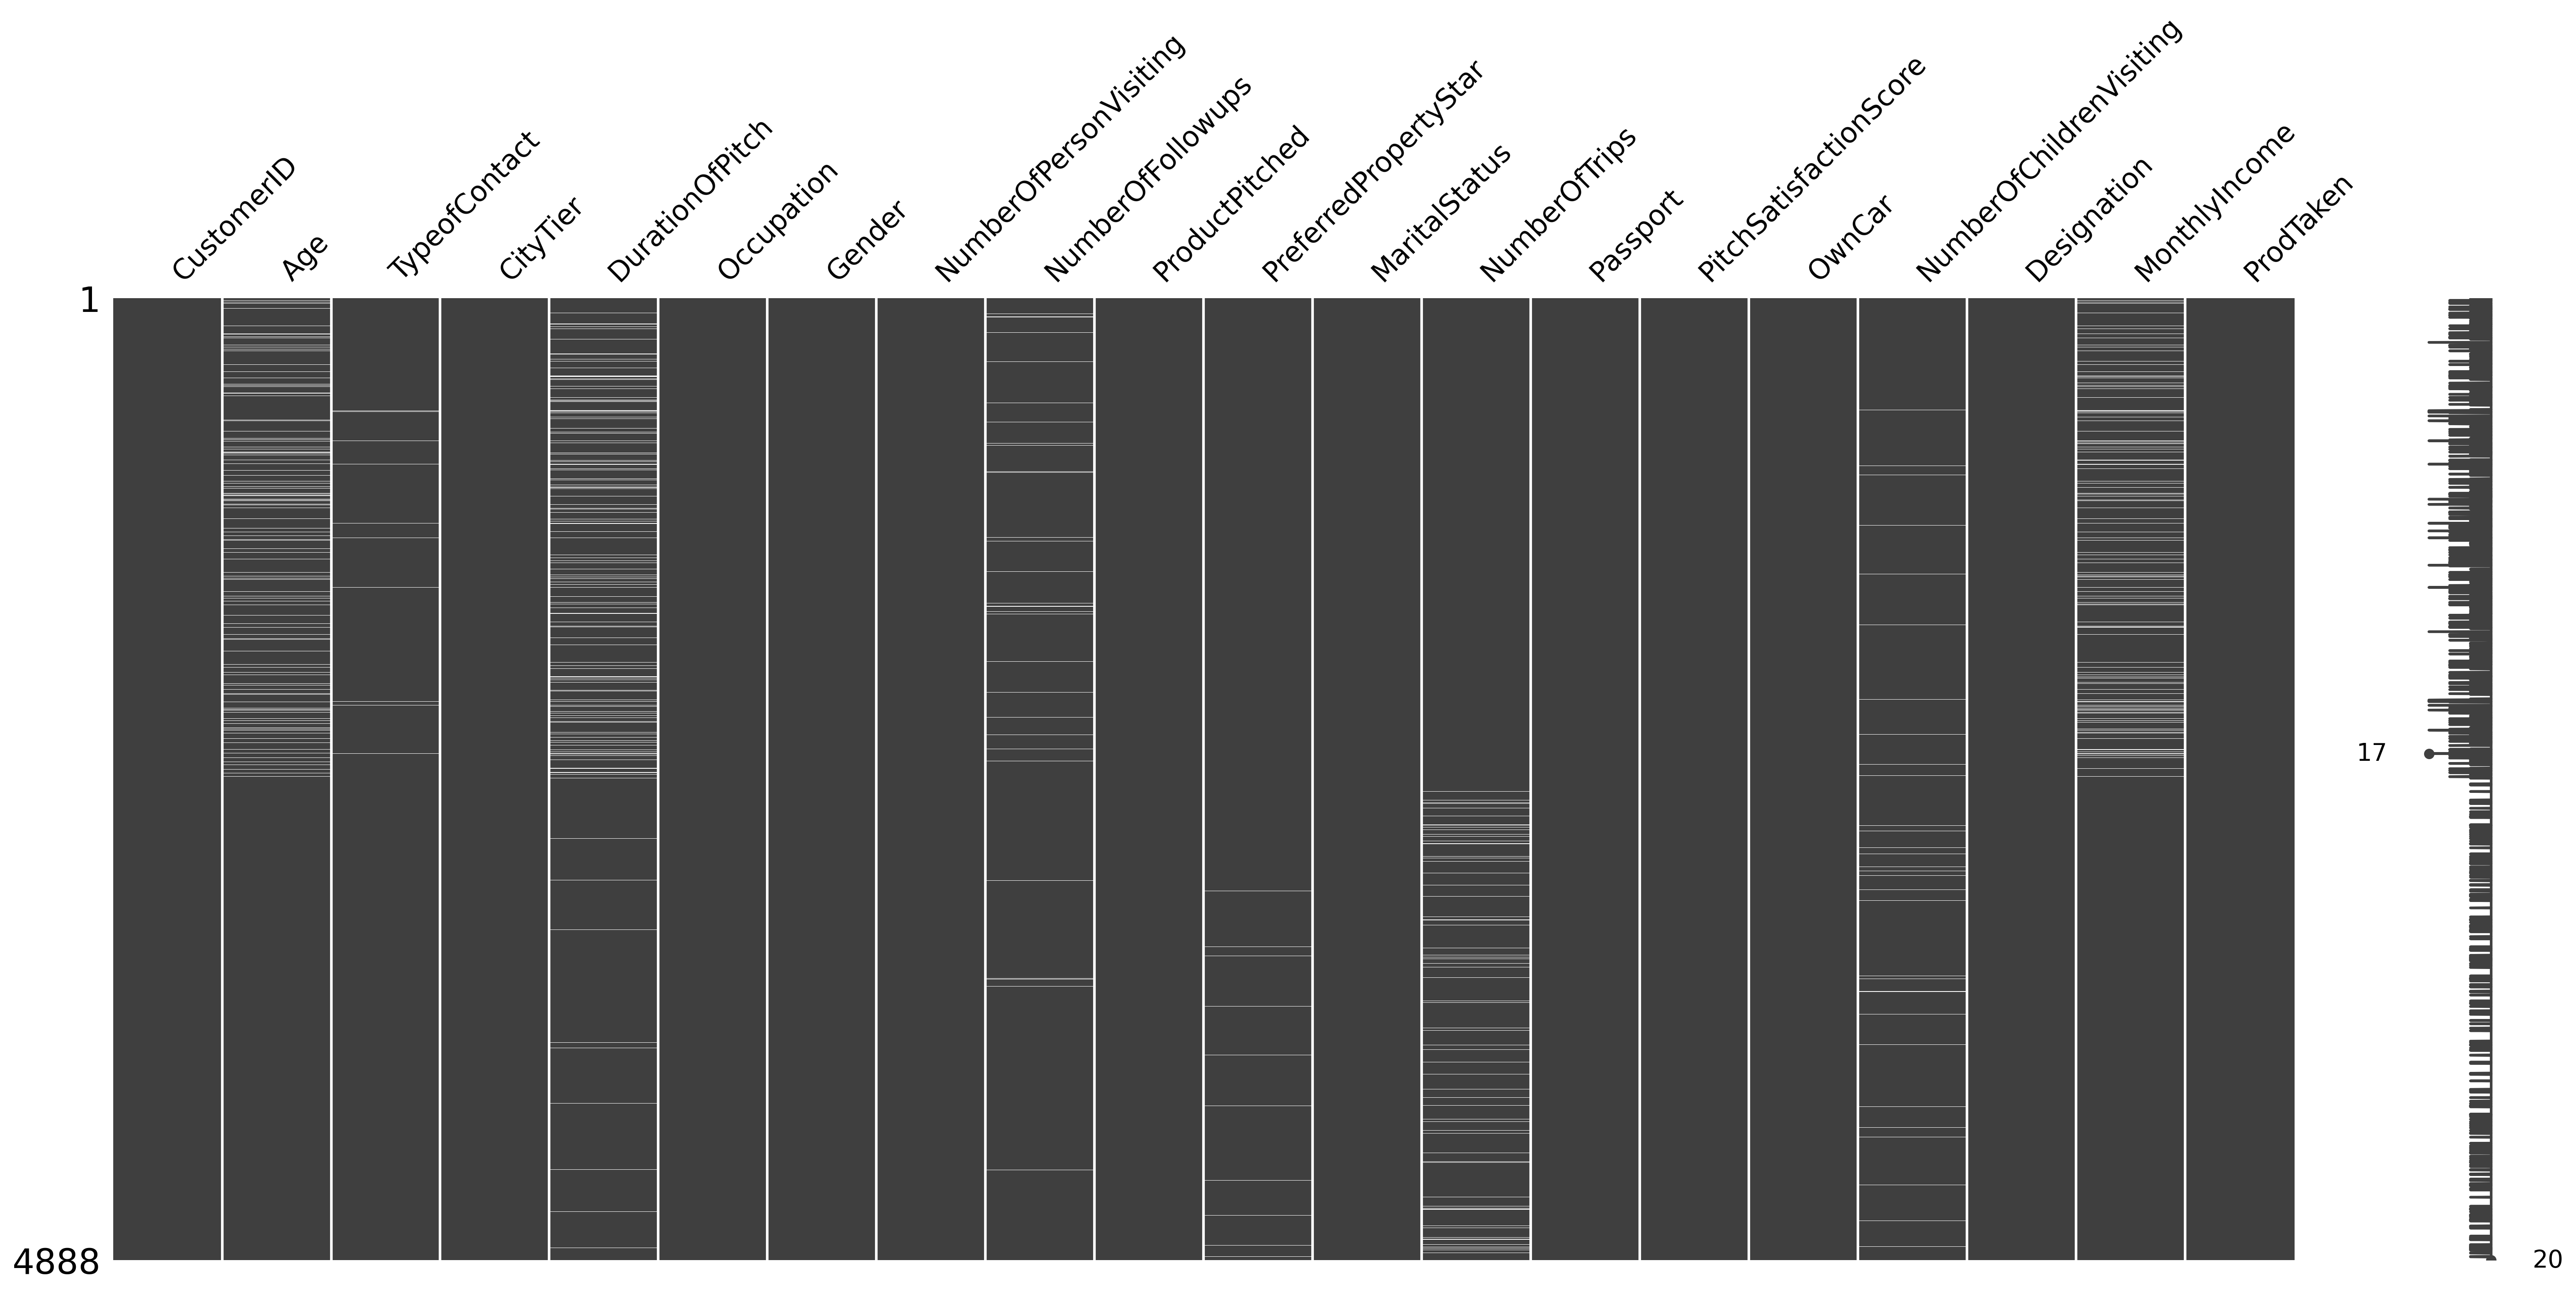

In [23]:
msno.matrix(df)
plt.show()


## 결측치 제거

In [29]:
# 결측값 표본 제거

#  특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['TypeofContact'])

df_drop_slt = df_drop_slt.drop(['CustomerID'],axis=1)

df_drop_slt.isnull().sum()

Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch             226
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
ProdTaken                     0
dtype: int64

## 결측치 채우기

In [30]:
## 결측값 기본 대치 방법들

# 중앙값 대치 - 컬럼 지정
df_median_slt = df_drop_slt.fillna({'MonthlyIncome':df['MonthlyIncome'].median()})

# 평균값 대치 - 전체 컬럼
df_mean_all = df_median_slt.fillna(df.mean())

df_mean_all.isnull().sum()

/var/folders/57/q_803frn7w10wt9_ntdqvb700000gn/T/ipykernel_56877/2189305918.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_all = df_median_slt.fillna(df.mean())


Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [31]:
df_mean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4863 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   CityTier                  4863 non-null   int64  
 3   DurationOfPitch           4863 non-null   float64
 4   Occupation                4863 non-null   object 
 5   Gender                    4863 non-null   object 
 6   NumberOfPersonVisiting    4863 non-null   int64  
 7   NumberOfFollowups         4863 non-null   float64
 8   ProductPitched            4863 non-null   object 
 9   PreferredPropertyStar     4863 non-null   float64
 10  MaritalStatus             4863 non-null   object 
 11  NumberOfTrips             4863 non-null   float64
 12  Passport                  4863 non-null   int64  
 13  PitchSatisfactionScore    4863 non-null   int64  
 14  OwnCar  

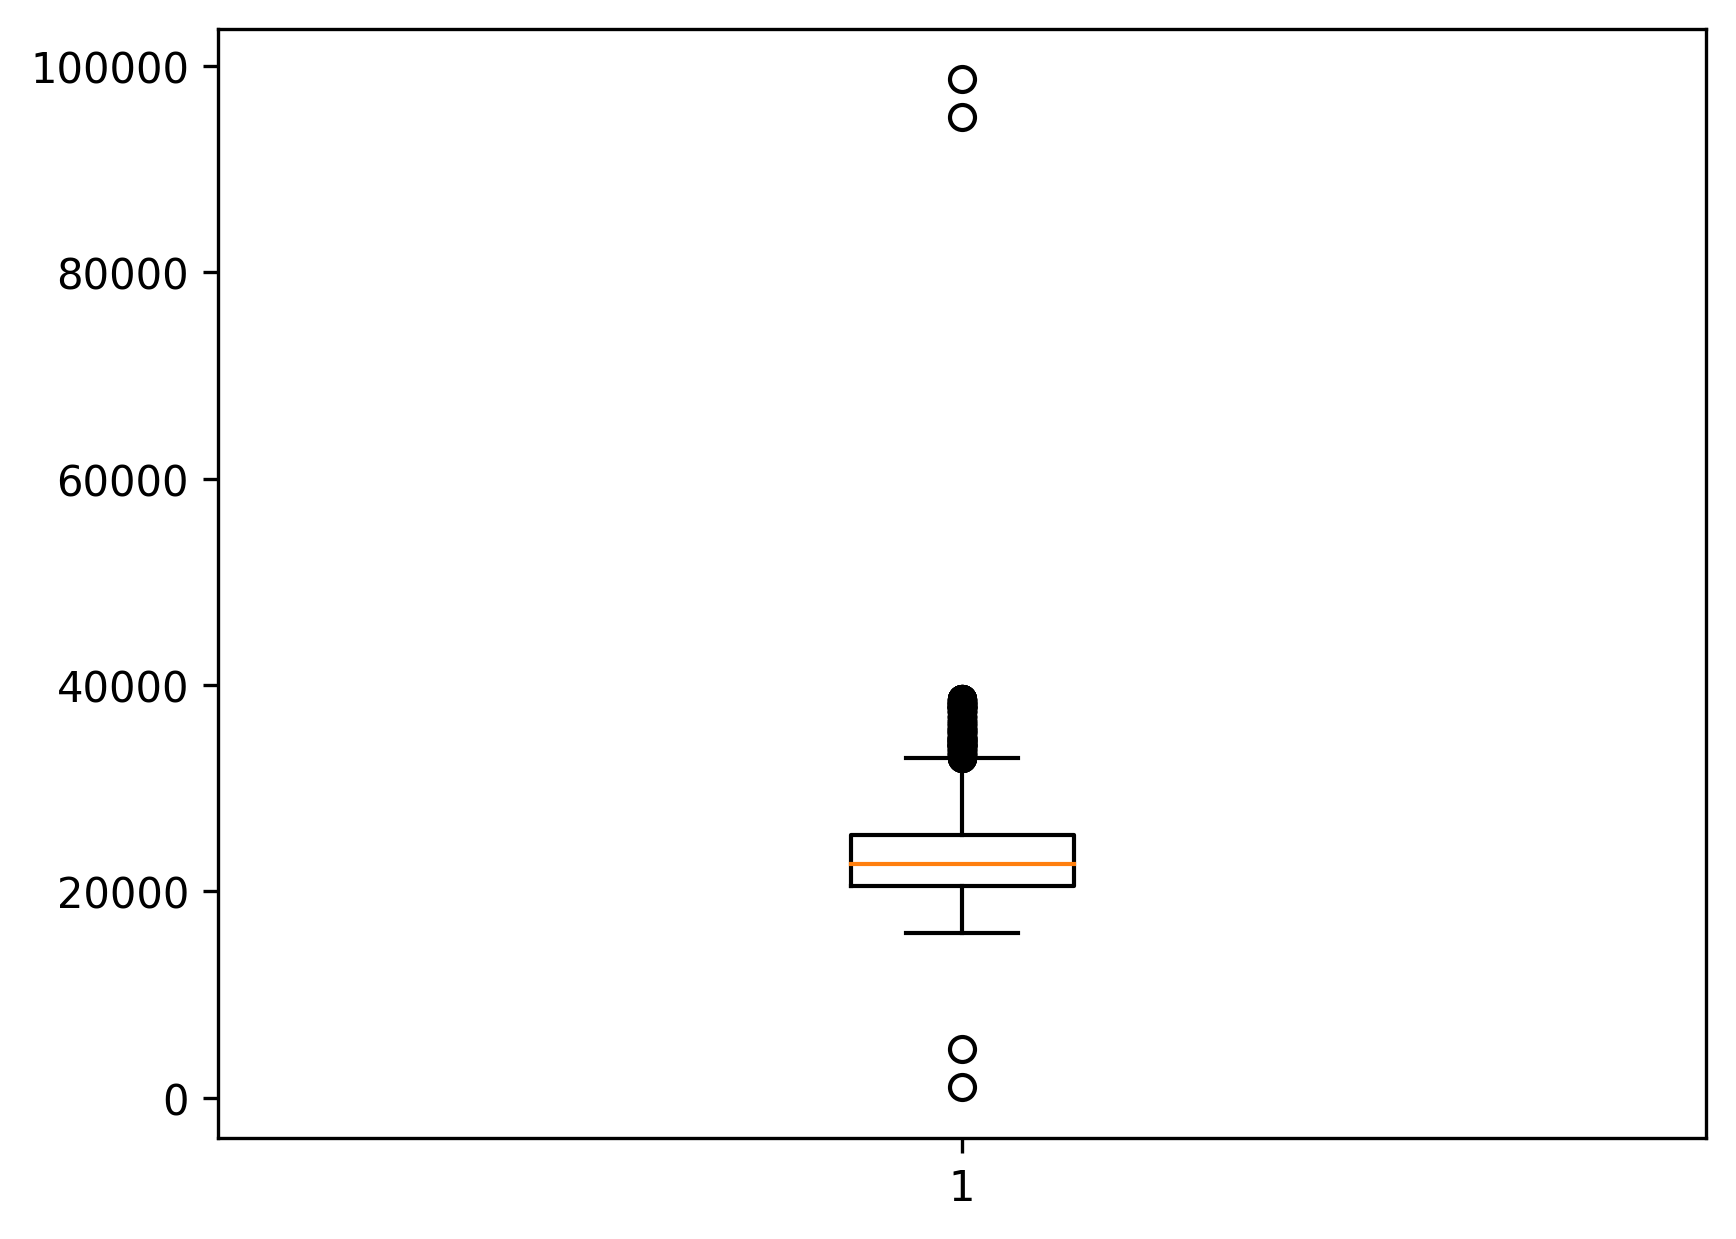

In [10]:

plt.boxplot(df_mean_all['MonthlyIncome'])
plt.show()

In [32]:
df_mean_all.to_csv('../data/Tourism_pre.CSV')